In [ ]:
import numpy as np
import pandas as pd
import json
import pickle

In [ ]:
vector_file = open('node_vectors_500.pickle', "rb")
adj = pickle.load(vector_file)
print(adj['machine_learning'].size)

128


In [ ]:
data = pd.DataFrame.from_dict(adj, orient='index')
data = data[~data.index.duplicated(keep='first')]
print(len(data))

13988


In [ ]:
# Standardizing the data

from sklearn.preprocessing import StandardScaler

standardized_vector = StandardScaler().fit_transform(data)
len(standardized_vector)

13988

In [ ]:
# Performing PCA due reduce the effect of the curse of dimensionality
# Remember to test for optimal number of components

from sklearn.decomposition import PCA
pca = PCA(n_components=6)

principalComponents = pca.fit_transform(standardized_vector)

principalDf = pd.DataFrame(data = principalComponents)
principalDf.head()

,0,1,2,3,4,5
0,-0.386822,-0.901220,1.085504,0.048701,-1.691690,1.276323
1,-1.889191,0.835328,1.357483,-1.717455,0.807843,0.363158
2,-1.941747,-0.615835,0.882207,-0.213435,-1.400206,-1.352018
3,-0.903497,-0.695601,1.803914,-1.977170,-1.297962,-1.130378
4,1.118133,-0.582713,-1.581990,1.048230,-0.901582,1.606032


In [ ]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters = 4)
ac.fit(principalDf)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4)

In [ ]:
ac_labels = pd.DataFrame(index=data.index)

ac_labels['label'] = ac.labels_
ac_labels.head(10)

,label
machine_learning,2
genetic_algorithm,3
classification,0
deep_learning,1
data_mining,2
cloud_computing,1
support_vector_machine,1
clustering,3
model_check,1
security,3


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(principalDf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
kmeans_labels = pd.DataFrame(index=data.index)

kmeans_labels['label'] = kmeans.labels_
kmeans_labels.head(10)

,label
machine_learning,7
genetic_algorithm,1
classification,7
deep_learning,0
data_mining,8
cloud_computing,5
support_vector_machine,3
clustering,4
model_check,7
security,3


In [ ]:
df = kmeans_labels[kmeans_labels['label']==9]
df.head(30)

,label
multiagent_system,9
business_process,9
internet_of_things,9
sentiment_analysis,9
knowledge_management,9
pattern_recognition,9
parallel_composition,9
verification,9
dynamic_programming,9
object_detection,9


In [ ]:
titles = []
titles.append('deep_learning')
titles.append('optimization')
titles.append('graphs')
titles.append('security')
titles.append('clustering')
titles.append('cloud_computing')
titles.append('algorithms')
titles.append('machine_learning')
titles.append('data_mining')
titles.append('internet_of_things')

labelled_df = kmeans_labels

labels = []
for i in range(len(kmeans_labels)):
  labels.append(titles[kmeans_labels['label'][i]])

labelled_df['keyword'] = labels
labelled_df.head(30)

,label,keyword
machine_learning,7,machine_learning
genetic_algorithm,1,optimization
classification,7,machine_learning
deep_learning,0,deep_learning
data_mining,8,data_mining
cloud_computing,5,cloud_computing
support_vector_machine,3,security
clustering,4,clustering
model_check,7,machine_learning
security,3,security


In [ ]:
final_df = labelled_df.drop(['label'], axis=1)
final_df.to_csv('final_labels.csv')

temp = pd.read_csv('final_labels.csv')
temp.head()

,Unnamed: 0,keyword
0,machine_learning,machine_learning
1,genetic_algorithm,optimization
2,classification,machine_learning
3,deep_learning,deep_learning
4,data_mining,data_mining


In [ ]:
# Took about 10 minutes to run for 5 features and ~14,000 keywords
from sklearn.cluster import AffinityPropagation

af = AffinityPropagation(preference=-50).fit(principalDf)

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_affinity_propagation.py:226: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  "will not have any cluster centers.", ConvergenceWarning)


In [ ]:
af_labels = pd.DataFrame(index=data.index)

af_labels['label'] = af.labels_
af_labels.head(10)

,label
machine_learning,-1
genetic_algorithm,-1
classification,-1
deep_learning,-1
data_mining,-1
cloud_computing,-1
support_vector_machine,-1
clustering,-1
model_check,-1
security,-1


In [ ]:
with open('adjacency_list.json') as fp:
  adj = json.load(fp)

In [ ]:
words = kmeans_labels[kmeans_labels['label']==12].index.values.tolist()
print(words)

['feature_selection', 'social_media', 'knowledge_management', 'intrusion_detection', 'random_oracle', 'recommender_system', 'fault_tolerance', 'social_network_analysis', 'evolutionary_algorithms', 'interoperability', 'user_interface', 'decision_making', 'twitter', 'linked_data', 'symbolic_execution', 'tree_automaton', 'case_study', 'monitoring', 'functional_programming', 'distributed_computing', 'active_learning', 'congestion_control', 'safety_property', 'mathematical_morphology', 'obstacle_avoidance', 'remote_sensing', 'random_walk', 'reverse_engineering', 'measurement', 'data_quality', 'mixed_reality', 'data_envelopment_analysis', 'ict', 'empirical_study', 'concept_lattice', 'camera_calibration', 'static_analysis', 'hidden_markov_model', 'emotions', 'quadratic_programming', 'collision_avoidance', 'chaos', 'pose_estimation', 'soft_constraint', 'animation', 'topology', 'competitive_analysis', 'undirected_graph', 'pedestrian_detection', 'logic', 'nonnegative_matrix_factorization', 'beli

In [ ]:
print(adj['feature_selection']['social_media'])

KeyError: ignored

In [ ]:
average_distances = []
x=[]
for group in pd.unique(kmeans_labels.label):
  x.append(group)
  sum=0
  cnt=0

  words = kmeans_labels[kmeans_labels['label']==group].index.values.tolist()
  #print(words)
  for i in range(len(words)):
    for j in range(i+1, len(words)):
      word1 = words[i]
      word2 = words[j]

      try:
        sum += adj[word1][word2]
      except:
        sum+=0
      cnt+=1

  average_distances.append(sum/cnt)

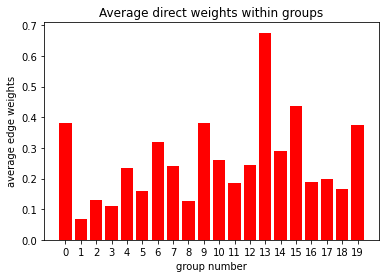

In [ ]:
import matplotlib.pyplot as plt

tick_label = x
plt.bar(x, average_distances, tick_label = tick_label,
        width = 0.8, color = ['red'])

plt.xlabel('group number')
plt.ylabel('average edge weights')
plt.title('Average direct weights within groups')
plt.show()

In [ ]:
labels.to_csv('labels.csv',index=True)

In [ ]:
sorted_labels = labels.sort_values(by='label')
sorted_labels.head()

,label
maximum_cardinality,0
visual_data,0
ideal_lattice,0
decision_fusion,0
citation_impact,0


In [ ]:
sorted_labels.to_csv('sorted_labels.csv',index=True)